In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [37]:
def loadHisto(fn):
    with open(fn, "r") as fp:
        head = fp.readline()
    dims = [section for section in head[1:].split()]
    dims = [tuple(int(x) for x in dim.split(",")) for dim in dims]
    data = np.loadtxt(fn)
    extent = np.array(tuple((d[2], d[3]) for d in dims)).flatten()
    return data.reshape(tuple(d[1] for d in dims)[::-1])[::-1], extent

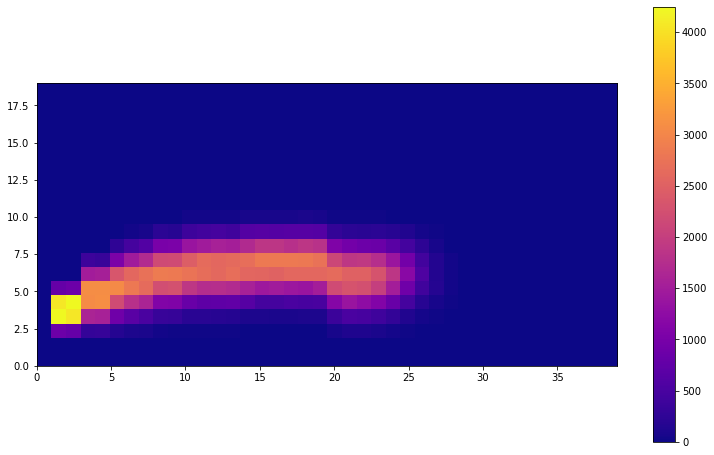

In [38]:
hist, extent = loadHisto("../build/turnMoneyPeak.hist")
plt.figure(figsize=(13, 8))
plt.imshow(hist, extent=extent, cmap="plasma")
plt.colorbar()

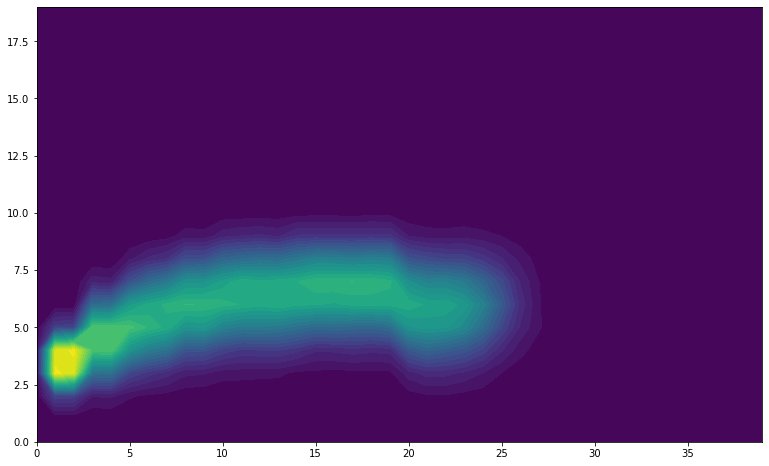

In [39]:
hist, extent = loadHisto("../build/turnMoneyPeak.hist")
plt.figure(figsize=(13, 8))
x = np.arange(extent[1]+1)
y = extent[3] - np.arange(extent[3]+1)
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, hist, 40)

In [46]:
money, moneyDev = np.loadtxt("../build/turnTotalMoney.data").T
score, scoreDev = np.loadtxt("../build/turnTotalScore.data").T
cards, cardsDev = np.loadtxt("../build/turnTotalCards.data").T
pkMoney, pkMoneyDev = np.loadtxt("../build/turnPeakMoney.data").T
curses, cursesDev = np.loadtxt("../build/turnTotalCurses.data").T

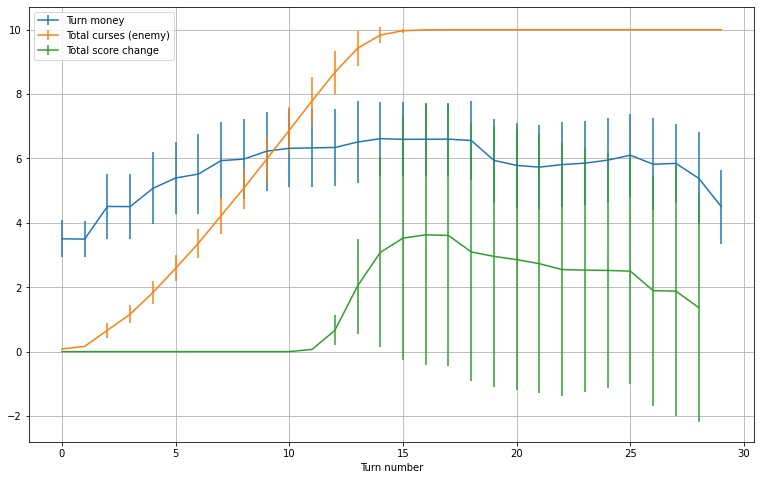

In [47]:
plt.figure(figsize=(13,8))

plt.errorbar(np.arange(len(pkMoney)), pkMoney, pkMoneyDev, label="Turn money")
plt.errorbar(np.arange(len(curses)), curses, cursesDev, label="Total curses (enemy)")
plt.errorbar(np.arange(len(score)-1), np.diff(score), scoreDev[:-1], label="Total score change")
#plt.errorbar(np.arange(len(money)), money/cards*20, moneyDev/cardsDev, label="Money density * 20")
plt.xlabel("Turn number")
plt.grid()
plt.legend()

35.0